In [23]:
%matplotlib inline

In [28]:
import pandas as pd


# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier #to calculate the distance
from scipy.stats import zscore

from sklearn.naive_bayes import GaussianNB



import numpy as np

import scipy.stats as stats
# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [68]:
loan_df = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")

In [69]:
loan_df.columns = [c.replace(' ', '_') for c in loan_df.columns]

In [70]:
loan_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [71]:
loan_df.head(50)

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [ ]:
# ‘Age’, ‘CC_Avg’, ‘ID’, ‘Income’, ‘Mortgage’, ‘Zip_Code’, ‘Experience’ are numeric variables
# ‘Education’, ‘Family’ are "Ordinal categorical variables".
#‘CD_Account’, ‘Credit_Card’, ‘Online’, ‘Personal_Loan’, ‘Securities Account’ - 5 Boolean variables

In [37]:
loan_df[~loan_df.applymap(np.isreal).all(1)] #No Missing Values

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard


In [8]:
loan_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [9]:
loan_df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [13]:
loan_df.describe()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [16]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Text(0.5, 0, 'Age')

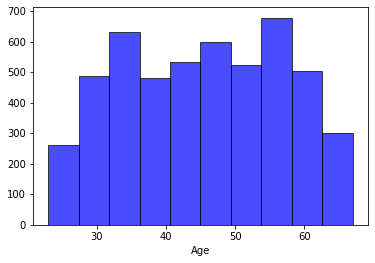

In [22]:
plt.hist(loan_df.Age, color='blue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Age')

In [30]:
stats.skew(loan_df.Age) 

-0.029331878574766698

In [ ]:
#Age Distribution -#There is very minute difference in the mean and median values. 
#there's hardly any skew

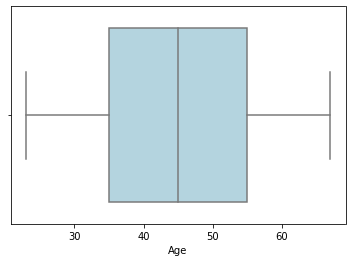

In [21]:
sns.boxplot(x= loan_df.Age, color='lightblue') #No outliers

Text(0.5, 0, 'Experience')

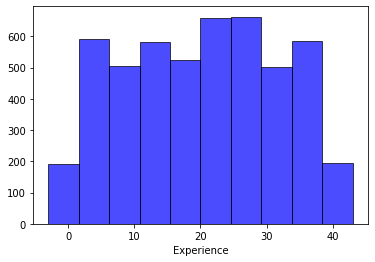

In [23]:
plt.hist(loan_df.Experience, color='blue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Experience')

In [38]:
stats.skew(loan_df.Experience) 

-0.026316790337654442

In [ ]:
#Experience Distribution -#There is very minute difference in the mean and median values. 
#There's hardly any skew

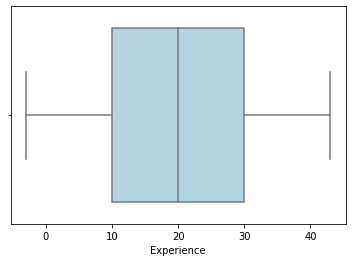

In [24]:
sns.boxplot(x= loan_df.Experience, color='lightblue') #No outliers

(array([ 802., 1153.,  867.,  879.,  377.,  307.,  268.,  197.,  141.,
           9.]),
 array([  8. ,  29.6,  51.2,  72.8,  94.4, 116. , 137.6, 159.2, 180.8,
        202.4, 224. ]),
 <a list of 10 Patch objects>)

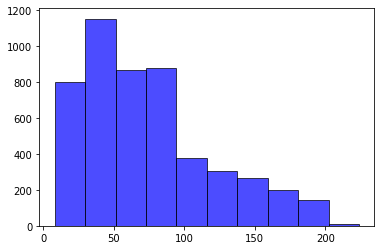

In [32]:
plt.hist(loan_df.Income, color='blue', edgecolor = 'black', alpha = 0.7)

In [34]:
stats.skew(loan_df.Income) 

0.8410861846424931

In [35]:
#Mean is greater than median and it quite moderately positive skewed and its has Right Skewed Distribution properties. 

Text(0.5, 0, 'Family')

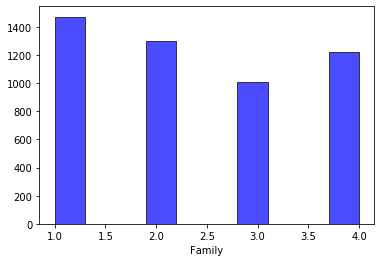

In [26]:
plt.hist(loan_df.Family, color='blue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Family')

In [42]:
(loan_df[loan_df["Family"] == 1].shape[0]*100)/loan_df.shape[0]

29.44

In [27]:
#Family size with 1 are the majority of the cutomers to the bank with 1400+(around 29%) and then Family size with 2 are second majority customer with 1200+

Text(0.5, 0, 'CCAvg')

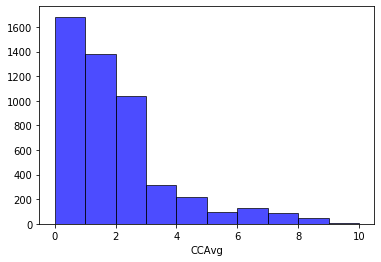

In [28]:
plt.hist(loan_df.CCAvg, color='blue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('CCAvg')

In [31]:
stats.skew(loan_df.CCAvg) 

1.5979637637001873

In [ ]:
#CCAvg a Right Skwed becoz it highly skwed to the left.

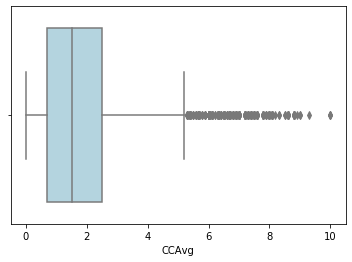

In [30]:
sns.boxplot(x= loan_df.CCAvg, color='lightblue') # Outlier Exists

Text(0.5, 0, 'Education')

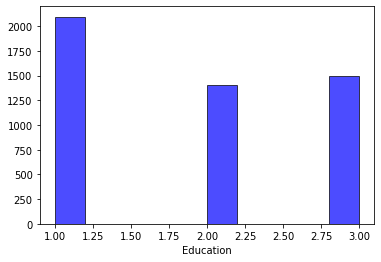

In [31]:
plt.hist(loan_df.Education, color='blue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Education')

In [ ]:
# Educaiton with level one are the majority of the cusromers with 2000+ to the bank n then level 3 n level 2.

Text(0.5, 0, 'Mortgage')

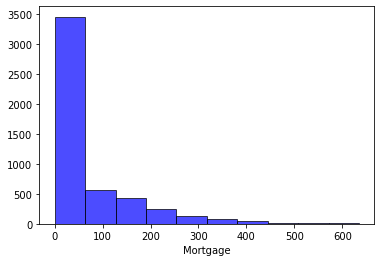

In [42]:
plt.hist(loan_df.Mortgage, color='blue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Mortgage')

In [35]:
loan_df[loan_df["Mortgage"] !=0].shape

(1538, 14)

In [36]:
stats.skew(loan_df.Mortgage) 

2.103371065804789

In [ ]:
#Mortgage a Right Skwed becoz it highly skwed to the left.

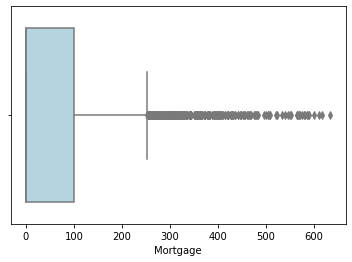

In [43]:
sns.boxplot(x= loan_df.Mortgage, color='lightblue') # Outlier Exists

Text(0.5, 0, 'Personal Loan')

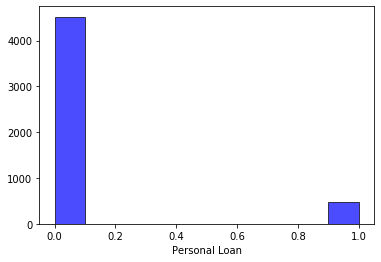

In [11]:
plt.hist(loan_df.Personal_Loan, color='blue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Personal Loan')


In [ ]:
#As per the last campaign they are 9% who are have accepted the personal loan

Text(0.5, 0, 'Securities Account')

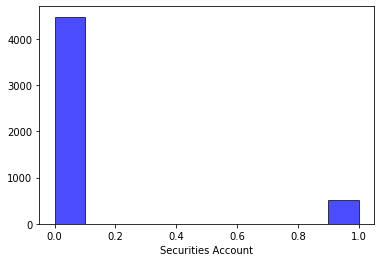

In [14]:
plt.hist(loan_df.Securities_Account, color='blue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Securities Account')


In [28]:
loan_df[loan_df["Securities_Account"] == 1].shape

(522, 14)

In [ ]:
#Very less customers maintain Securities Account
#Around 90% of the customer doesn’t have a securities account with the bank.

Text(0.5, 0, 'CD Account')

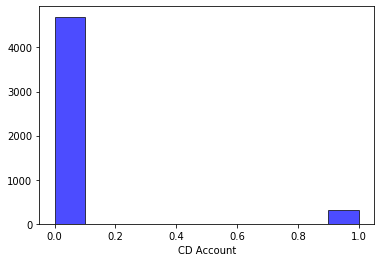

In [29]:
plt.hist(loan_df.CD_Account	, color='blue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('CD Account')


In [ ]:
#Very less customers have certificate of deposit account
#94% of the customer doesn’t have a certificate of deposit (CD) account with the bank.

Text(0.5, 0, 'Online')

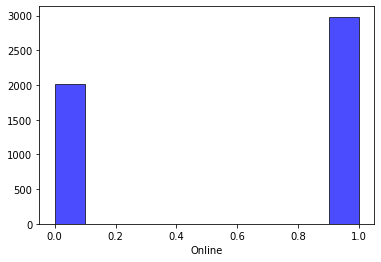

In [30]:
plt.hist(loan_df.Online	, color='blue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Online')


In [ ]:
#more than 50% of the customer use internet bank facilities 

Text(0.5, 0, 'Online')

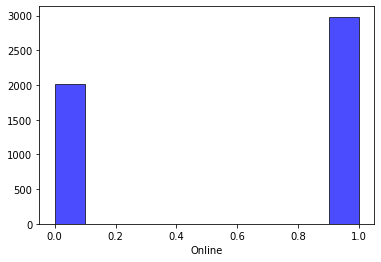

In [32]:
plt.hist(loan_df.Online	, color='blue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Online')

In [ ]:
#more than 50% of the customer have uses Universal Bank credit card 

In [ ]:
#Target Colomn is selected as Personal Loan becoz we need to predict the customer who can opt for Personal Loan.

In [36]:
loan_df.groupby(["Personal_Loan"]).count()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
Personal_Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


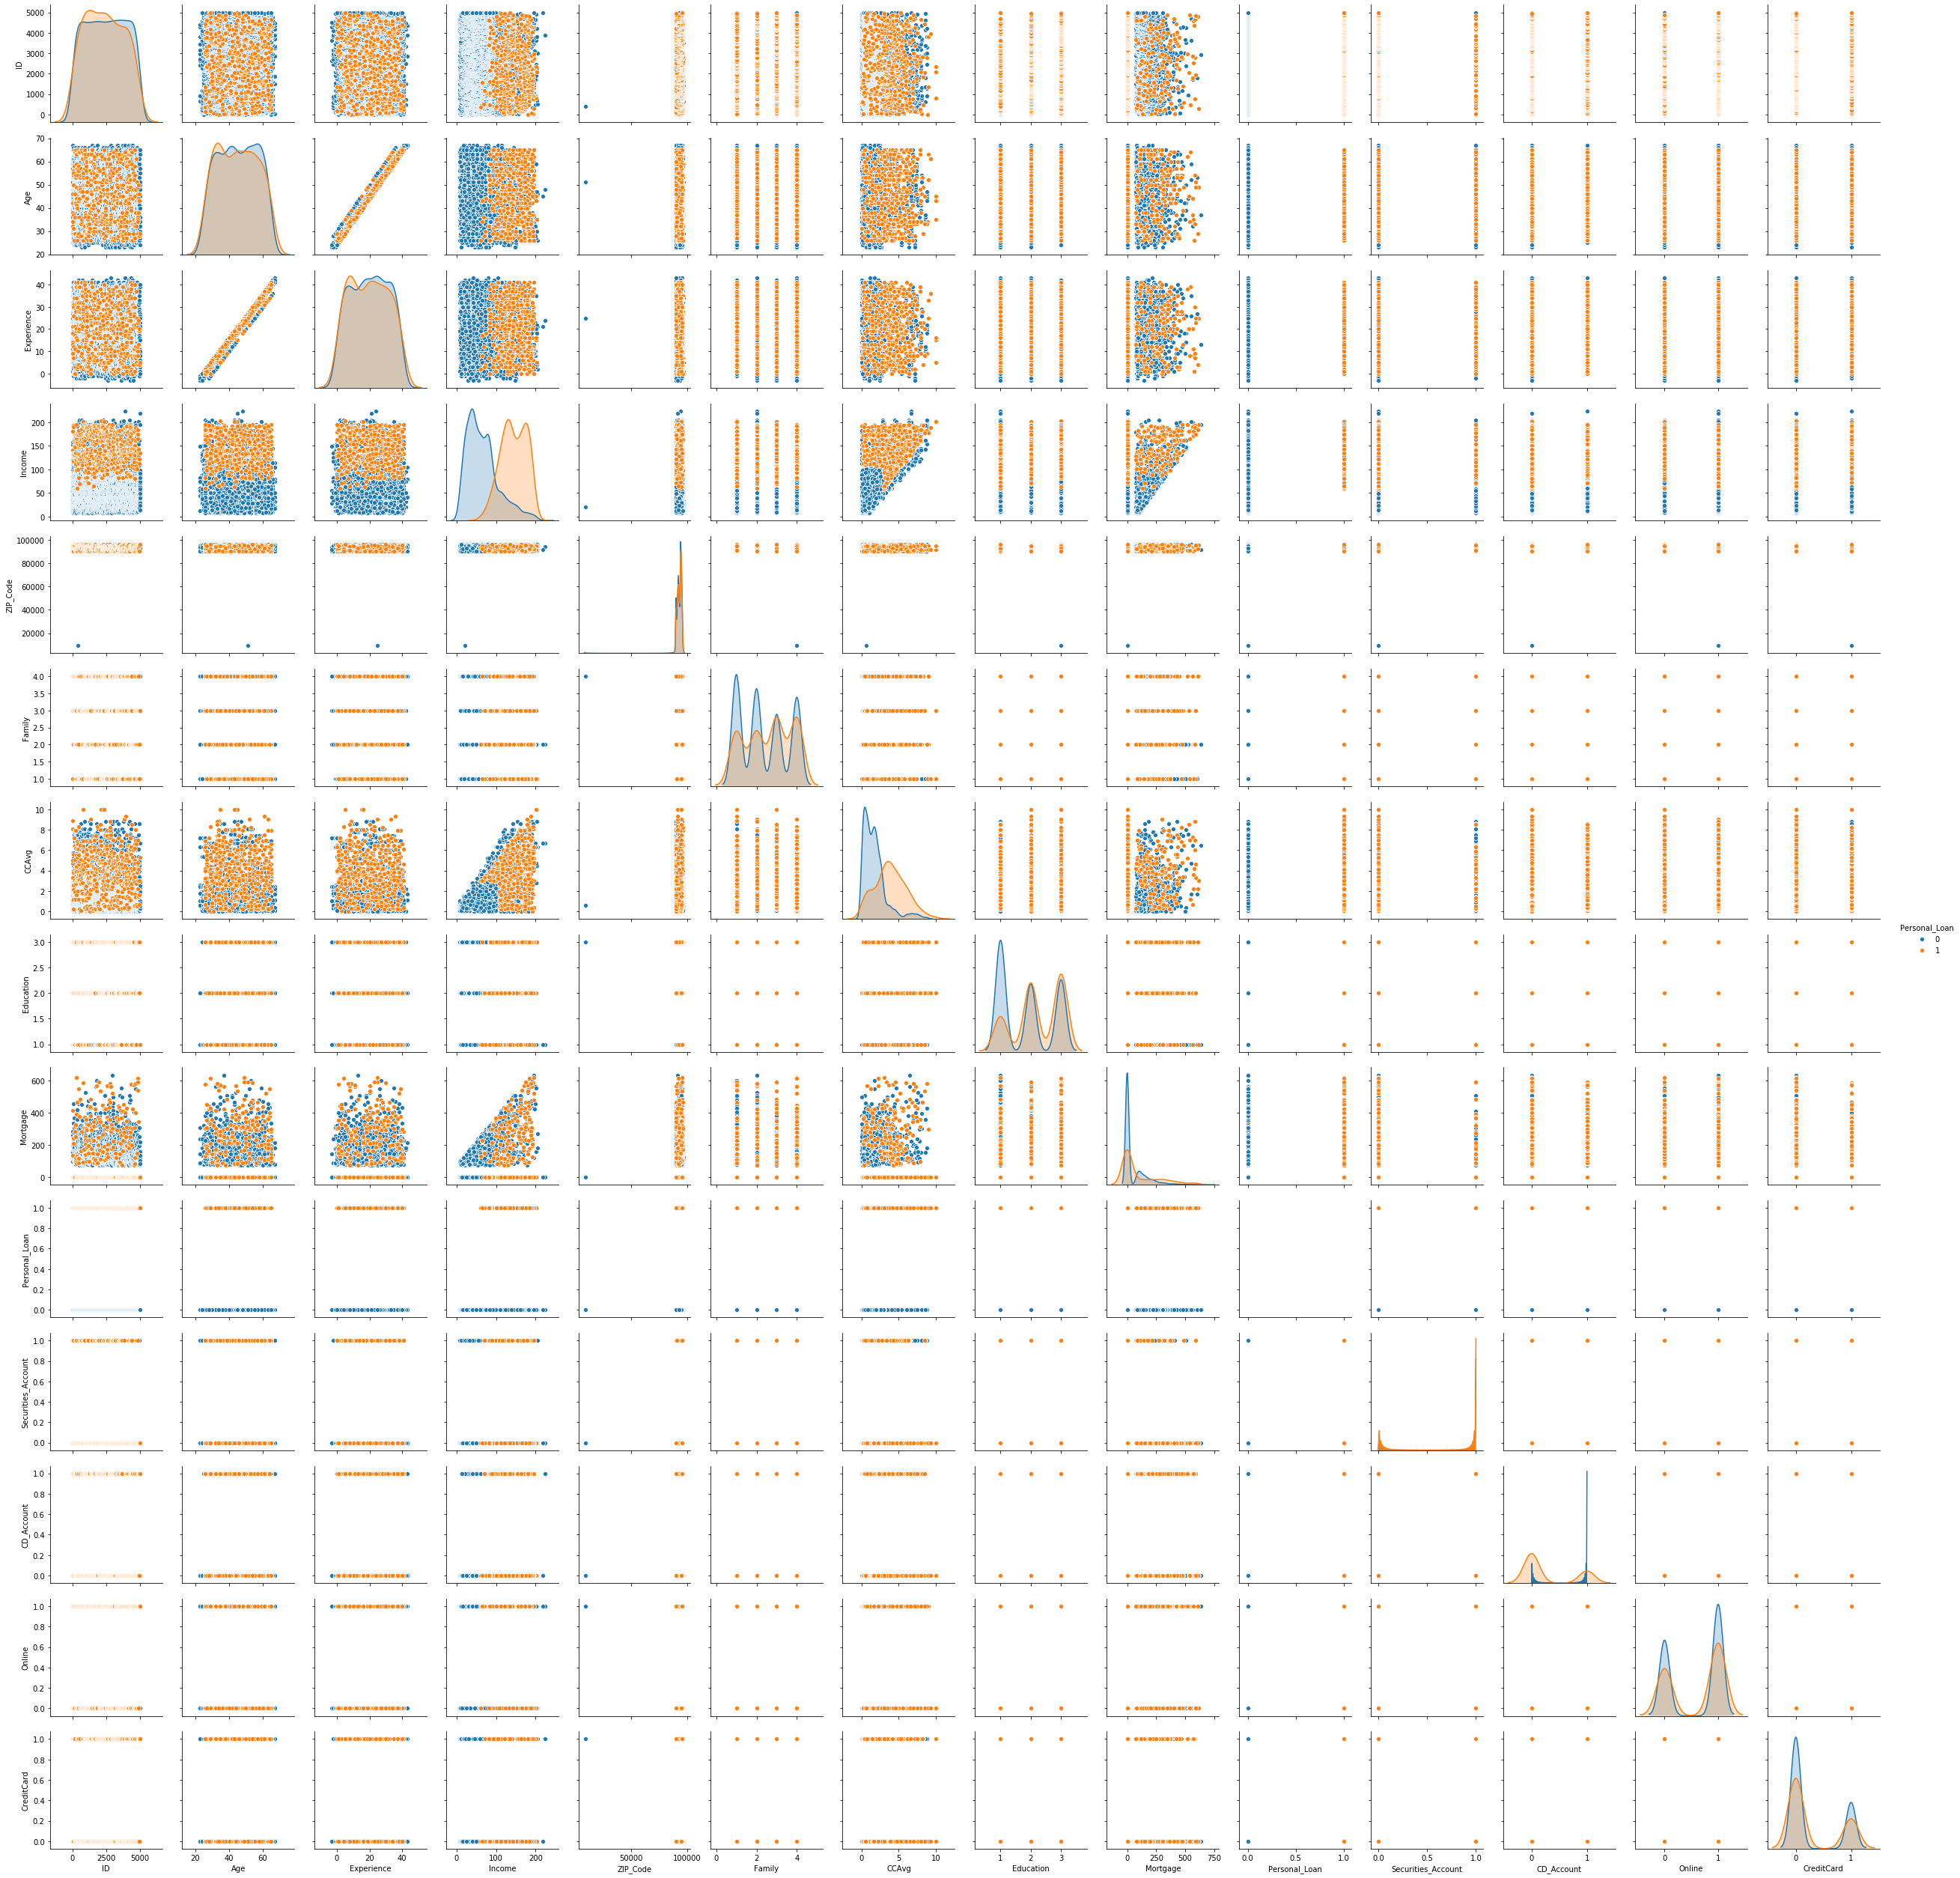

In [38]:
sns.pairplot(loan_df , hue='Personal_Loan' , diag_kind = 'kde')

In [124]:
loan_df.corr()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP_Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal_Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [ ]:
#Personal Loan is highly correlated with Income, average spending on Credit cards, mortgage & if the customer has a certificate of deposit (CD) account with the bank.
#Experience is highly correlated with Age

In [72]:
loan_df.drop("ID" ,axis =1,inplace=True) #  ‘ID’ and ‘ZIP_Code’ are just numbers of series dropping them
loan_df.drop("ZIP_Code" ,axis =1,inplace=True)
loan_df.head()
#Target Variable is Personal_Loan to classify whether the customer has taken loan or not. Based on the Target variable we are analaysing it with each colum to predict the customer gonna take loan or not. 

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [55]:
loan_df_array = loan_df.drop("Personal_Loan" ,axis =1)
loan_df_array.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [56]:
array = loan_df_array.values
X = array[:,:]
len(X)

5000

In [57]:
array_personalloan = loan_df.values
Y = array_personalloan[:,7]
Y

array([0., 0., 0., ..., 0., 0., 0.])

In [47]:
len(Y)

5000

In [58]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)

numpy.ndarray

In [59]:
# Fit the model on original data i.e. before upsampling
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9533333333333334
[[1342   20]
 [  50   88]]
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      1362
         1.0       0.81      0.64      0.72       138

    accuracy                           0.95      1500
   macro avg       0.89      0.81      0.85      1500
weighted avg       0.95      0.95      0.95      1500



In [ ]:

cm = metrics.confusion_matrix(y_test, y_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['No-PL', 'PL']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [61]:
X = loan_df_array.iloc[:,:] # select all rows and first 8 columns which are the attributes
Y = loan_df.iloc[:,7]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)

pandas.core.frame.DataFrame

In [62]:
import statsmodels.api as sm

X_train = X_train.apply(lambda x: x.fillna(x.median()),axis=1)

mdl = sm.MNLogit(y_train, X_train).fit()

print(mdl.summary())

Optimization terminated successfully.
         Current function value: 0.138419
         Iterations 9
                          MNLogit Regression Results                          
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                        MNLogit   Df Residuals:                     3489
Method:                           MLE   Df Model:                           10
Date:                Mon, 06 Apr 2020   Pseudo R-squ.:                  0.5675
Time:                        00:10:54   Log-Likelihood:                -484.47
converged:                       True   LL-Null:                       -1120.1
Covariance Type:            nonrobust   LLR p-value:                6.016e-267
   Personal_Loan=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -0.5064      0.026    -19.655      0.000      -0.557      -0.456
Exper

In [73]:
loan_df_dummy = loan_df
loan_df_dummy.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [74]:
loan_df_dummy['Personal_Loan'] = loan_df_dummy['Personal_Loan'].replace(1, "Y")
loan_df_dummy['Personal_Loan'] = loan_df_dummy['Personal_Loan'].replace(0, "N")
loan_df_dummy.head(50)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,N,1,0,0,0
1,45,19,34,3,1.5,1,0,N,1,0,0,0
2,39,15,11,1,1.0,1,0,N,0,0,0,0
3,35,9,100,1,2.7,2,0,N,0,0,0,0
4,35,8,45,4,1.0,2,0,N,0,0,0,1
5,37,13,29,4,0.4,2,155,N,0,0,1,0
6,53,27,72,2,1.5,2,0,N,0,0,1,0
7,50,24,22,1,0.3,3,0,N,0,0,0,1
8,35,10,81,3,0.6,2,104,N,0,0,1,0
9,34,9,180,1,8.9,3,0,Y,0,0,0,0


In [65]:
loan_df_dummy.groupby(["Personal_Loan"]).count()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
Personal_Loan,,,,,,,,,,,
N,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
Y,480,480,480,480,480,480,480,480,480,480,480


In [12]:
#loan_df_dummy = loan_df_dummy.fillna(loan_df_dummy.median())

In [75]:
colnames = loan_df_dummy.columns
#colnames.remove("Personal_Loan")
colnames = np.delete(colnames,7)
len(colnames)

11

In [76]:
loan_df__z = loan_df_dummy[colnames].apply(zscore)  # convert all attributes to Z scale 

loan_df__z['Personal_Loan'] = loan_df_dummy['Personal_Loan']

In [77]:
loan_df__z.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Personal_Loan
0,-1.774417,-1.666078,-0.538229,1.397414,-0.193385,-1.049078,-0.555524,2.928915,-0.25354,-1.216618,-0.645314,N
1,-0.029524,-0.096330,-0.864109,0.525991,-0.250611,-1.049078,-0.555524,2.928915,-0.25354,-1.216618,-0.645314,N
2,-0.552992,-0.445163,-1.363793,-1.216855,-0.536736,-1.049078,-0.555524,-0.341423,-0.25354,-1.216618,-0.645314,N
3,-0.901970,-0.968413,0.569765,-1.216855,0.436091,0.141703,-0.555524,-0.341423,-0.25354,-1.216618,-0.645314,N
4,-0.901970,-1.055621,-0.625130,1.397414,-0.536736,0.141703,-0.555524,-0.341423,-0.25354,-1.216618,1.549632,N


In [78]:
loan_df__z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
Age                   5000 non-null float64
Experience            5000 non-null float64
Income                5000 non-null float64
Family                5000 non-null float64
CCAvg                 5000 non-null float64
Education             5000 non-null float64
Mortgage              5000 non-null float64
Securities_Account    5000 non-null float64
CD_Account            5000 non-null float64
Online                5000 non-null float64
CreditCard            5000 non-null float64
Personal_Loan         5000 non-null object
dtypes: float64(11), object(1)
memory usage: 468.9+ KB


In [79]:
array = loan_df__z.values
X = array[:,0:11] # select all rows and first 8 columns which are the attributes
Y = array[:,11]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [80]:
Y

array(['N', 'N', 'N', ..., 'N', 'N', 'N'], dtype=object)

In [83]:
NNH = KNeighborsClassifier(n_neighbors= 5)

NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [84]:
 y_train

array(['N', 'N', 'N', ..., 'Y', 'N', 'N'], dtype=object)

In [85]:
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.9593333333333334

In [60]:
y = 0
n = 0
for i in predicted_labels:
    if(i == 'Y'):
        y = y+1
    if (i == 'N'):
        n = n+1
y
n

1417

In [86]:
print(metrics.confusion_matrix(y_test, predicted_labels))
print(metrics.classification_report(y_test, predicted_labels))

[[1354    8]
 [  53   85]]
              precision    recall  f1-score   support

           N       0.96      0.99      0.98      1362
           Y       0.91      0.62      0.74       138

    accuracy                           0.96      1500
   macro avg       0.94      0.81      0.86      1500
weighted avg       0.96      0.96      0.96      1500



In [81]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
myList = list(range(1,50))


# empty list that will hold cv scores
cv_scores = []
k_neighbors = []

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)


MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

The optimal number of neighbors is 5


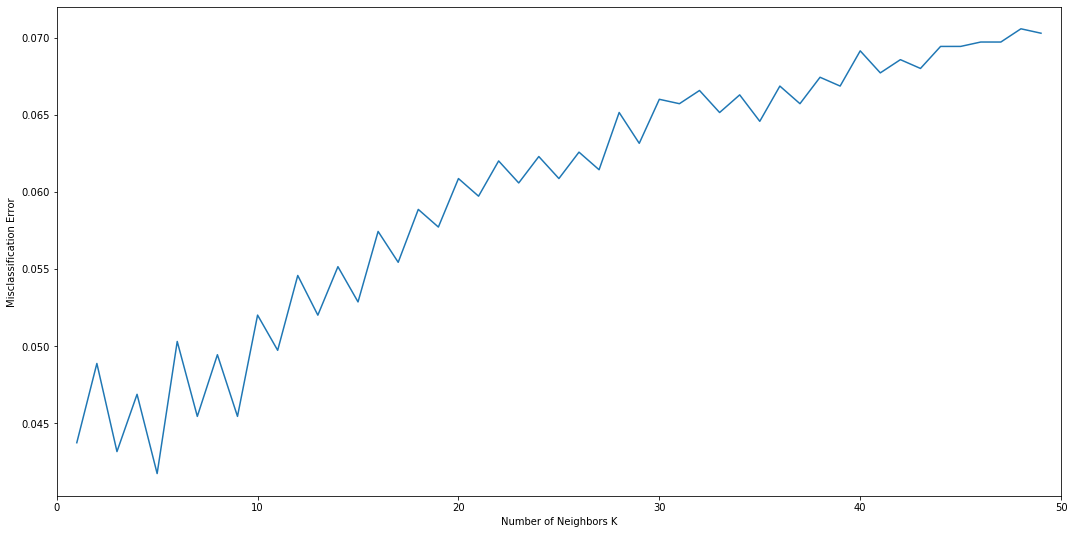

In [82]:
%matplotlib inline 
import matplotlib.pyplot as plt

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.xlim(0,50)


# plot misclassification error vs k
plt.plot(k_neighbors, MSE)



plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [87]:
loan_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,N,1,0,0,0
1,45,19,34,3,1.5,1,0,N,1,0,0,0
2,39,15,11,1,1.0,1,0,N,0,0,0,0
3,35,9,100,1,2.7,2,0,N,0,0,0,0
4,35,8,45,4,1.0,2,0,N,0,0,0,1


In [88]:
X =  loan_df.drop("Personal_Loan", axis=1)
y =  loan_df.pop("Personal_Loan")


In [89]:
X

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,1,0


In [90]:
y

0       N
1       N
2       N
3       N
4       N
       ..
4995    N
4996    N
4997    N
4998    N
4999    N
Name: Personal_Loan, Length: 5000, dtype: object

In [91]:
train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.30, random_state=1)
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model = GaussianNB()
model.fit(train_set, train_labels)
model.score(train_set , train_labels)      # performance on test data

0.89

In [92]:
test_pred = model.predict(test_set)

print(metrics.classification_report(test_labels, test_pred))
print(metrics.confusion_matrix(test_labels, test_pred))

              precision    recall  f1-score   support

           N       0.95      0.91      0.93      1351
           Y       0.41      0.56      0.47       149

    accuracy                           0.87      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.87      0.88      1500

[[1228  123]
 [  65   84]]


In [ ]:
#And here we are with a classification report which consists of a precision, recall, f1-score & support, Also the accuracy_score and a 2*2 confusion matrix. 
#Well first have a look at the accuracy, accuracy is not a small thing, but we know from the data that the number of buyer’s percentage to the non-buyer percentage is very less. Hence accuracy didn’t play a big role in determining how our model performed in Every Model.
#Accuracy score we dont take into consideration we consider only Recall how good the model is.
#We will look upon the error types now:
#------->Type I error
                #Actually null hypothesis but predicted alternate hypothesis by the model
#------->Type II error 
                #Actually alternate hypothesis but predicted null hypothesis by the model
#In our case, the null hypothesis presents the non-buyer case, while the alternate hypothesis is the buyer one.
#We must concentrate upon or reduce type II error here since we are interested in the customers who had actually bought personal loans, but our model predicted them to be a non-buyer.
#Eventually, we can concentrate upon our confusion matrix and look for the False Negatives, less the number of False Negatives, wiser our model will be 
#or we can directly look upon the recall for ‘1’.


#So, in the case of Logistic:-
     #out of the total number of customers who actually bought personal loans our model is only able to pick 64% of customers of them to be correctly predicted. With Accuracy 95%
#So, in the case of KNN :-
    #out of the total number of customers who actually bought personal loans our model is only able to pick 62% of customers of them to be correctly predicted. With Accuracy 96%
#So, in the case of  Naive Bayes:-
     #out of the total number of customers who actually bought personal loans our model is only able to pick 56% of customers of them to be correctly predicted. With Accuracy 89%
    
    #Comparing to Naive Bayes, Logistic and KNN are performing good. 